# **Audio Classification**

**Dataset Link**
https://urbansounddataset.weebly.com/download-urbansound8k.html

### **1. Exploratory Data Analysis**

In [ ]:
!pip install librosa

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import IPython.display as ipd   #audio file display karne ke liye
import librosa                  #audio signals ko analyze and process karne ke liye, extracting features from audio
import librosa.display          #audio data se related varioous visualizations display karne ke liye like waveforms,spectrogram etc
import matplotlib.pyplot as plt #2D plotting ke liye
%matplotlib inline

In [ ]:
filename='/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/dog_bark.wav'
data, sample_rate = librosa.load(filename)
#load and retrieve audio data of dog_bark with sample rate
# data -> 1D numpy array containing amplitude of audio signals at a specific point in time
# Sample rate -> the number of samples ya data points of the audio signal recorded per second.

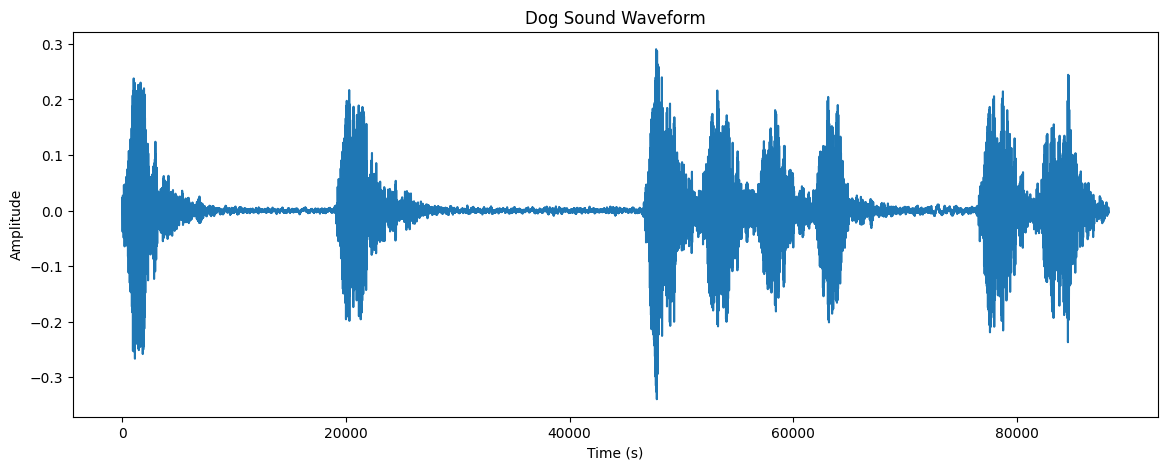

In [ ]:
# Ploting the waveform using matplotlib
plt.figure(figsize=(14, 5))
plt.title('Dog Sound Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(data)
plt.show()

# Playing the audio using IPython.display
ipd.Audio(filename)

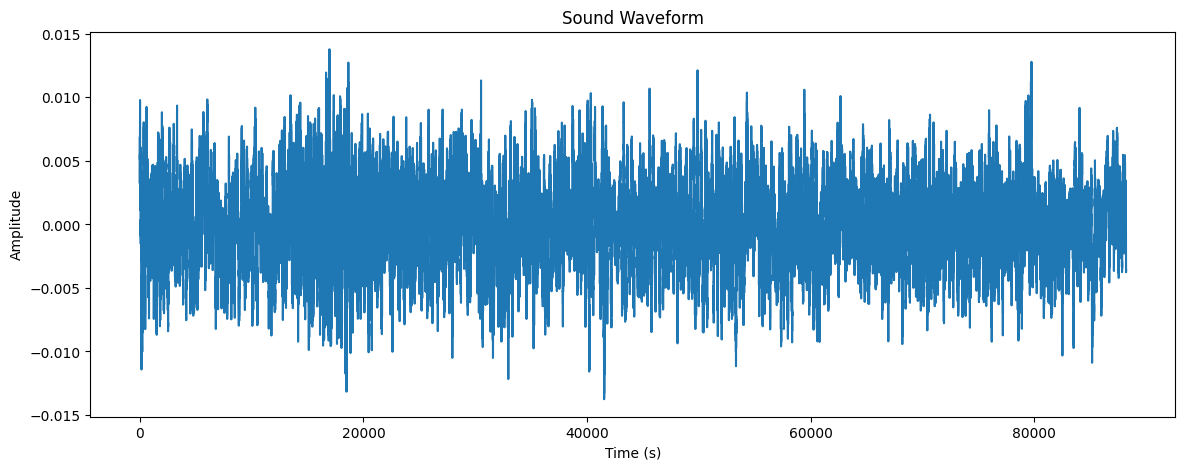

In [ ]:
# Sound
filename='/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold5/100263-2-0-3.wav'
data, sample_rate = librosa.load(filename)


# Plot the waveform using matplotlib
plt.figure(figsize=(14, 5))
plt.title('Sound Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(data)
plt.show()

# Play the audio
ipd.Audio(filename)

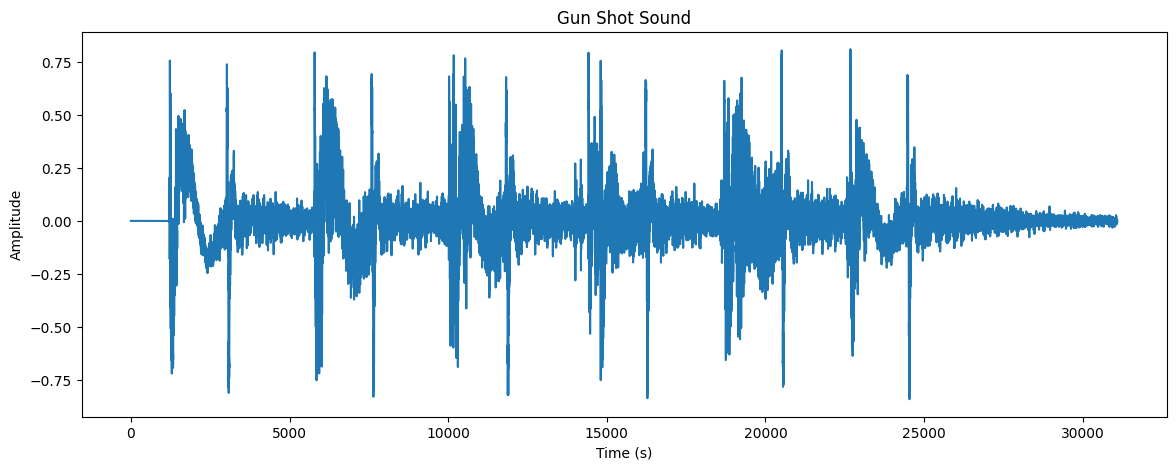

In [ ]:
# gunshot
filename='/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/gun_shot.wav'
data, sample_rate = librosa.load(filename)


# Plot the waveform using matplotlib
plt.figure(figsize=(14, 5))
plt.title('Gun Shot Sound')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.plot(data)
plt.show()

# Play the audio
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav               #used for reading and writing wav files
wave_sample_rate, wave_audio=wav.read(filename)   #read audio wav file named file name and return sample_rate and a numpy array contianing audio data

In [ ]:
wave_sample_rate

44100

In [ ]:
wave_audio #each and every signal of the sound wave can be represented by a number
# wave_audio is from scipy NOTE: yaha pe noramlise nhi ho rha

array([[  0,   0],
       [  0,   0],
       [  0,   0],
       ...,
       [ 40, -12],
       [130, 190],
       [212, 107]], dtype=int16)

In [ ]:
data
#this is from librosa NaOTE:normalise ho rha hai

array([ 0.        ,  0.        ,  0.        , ..., -0.00817732,
        0.00073281,  0.00412673], dtype=float32)

In [ ]:
import pandas as pd         #for data manipulation and analysis

metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
# Check whether the dataset is imbalanced
metadata['class'].value_counts()
#yes pretty good balanced

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

### **2. DATA PREPROCESSING**

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio/fold5/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[ 0.00331575  0.00467553  0.00361099 ... -0.00376796 -0.00347471
 -0.00357828]


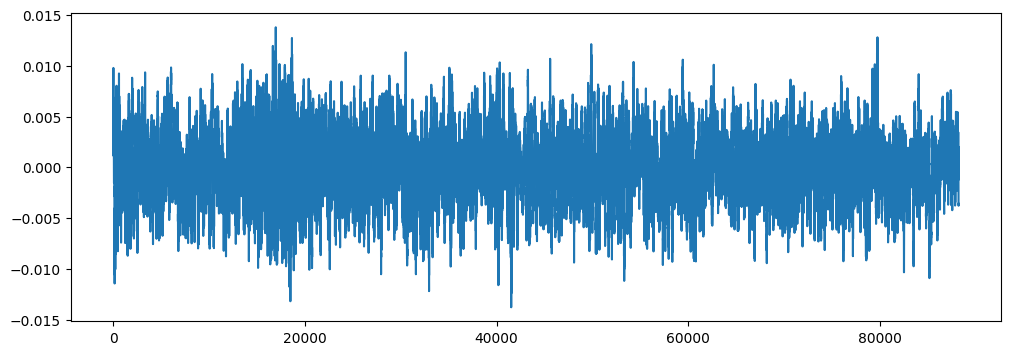

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

**OBSERVATION**

Here Librosa converts the signal to mono, meaning the channel will always be 1




In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
wave_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

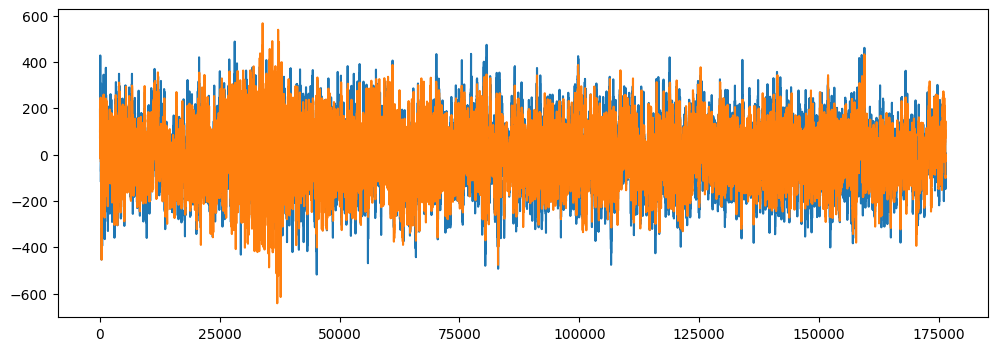

In [ ]:
# Original audio with 2 channels
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

**OBSERVATION**

Here scipy does not convert the signal to mono.

**EXTRACT FEATURES**

Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)



**Converts the audio signals into an array of dimension (40,173). It gives nothing but the patterns that has been extracted based on frequency and time characteristics. It will uniquely identify the audio in which category it lies.**


In [ ]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085269e+02],
       [ 1.1530264e+02,  1.1144248e+02,  1.1125225e+02, ...,
         1.1112500e+02,  1.1057969e+02,  1.0299151e+02],
       [-1.8326145e+01, -2.4682449e+01, -3.0259777e+01, ...,
        -8.2357597e+00, -9.0665245e+00, -4.5019588e+00],
       ...,
       [-2.8760364e+00, -3.2479844e+00, -4.8965559e+00, ...,
        -5.2024126e-01,  3.5672538e+00,  7.4937549e+00],
       [-4.2968613e-01, -5.8838451e-01, -8.1723857e-01, ...,
         1.8340701e-01,  7.6732528e-01,  2.7120016e+00],
       [-1.1780679e+00,  6.9809175e-01,  6.3521585e+00, ...,
        -2.6222010e+00, -4.7912731e+00, -3.1826334e+00]], dtype=float32)

In [ ]:
# Extracting MFCC's For every audio file (8732) in below steps
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/audio'
metadata=pd.read_csv('/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

    return mfccs_scaled_features

    #ek function bna diya feature extraction ka ab isko har ek audio file ke liye  kar denge

In [ ]:
%pip install resampy


In [ ]:
import numpy as np
from tqdm import tqdm  #to see the progress of iterations
import resampy
# Iterate through every audio file and extract features using mfcc
extracted_features=[]
#metadata is dataframe and iterrows will itereate over every row in the dataframe
for index_num,row in tqdm(metadata.iterrows()):
    #yaha pe audio dataset ke path ko uske folder name ke saath join kar diya and file name bhi milega
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    #jaise he file name mil gya toh usse class nikaal lenge
    final_class_labels=row["class"]
    #pass the filname in feature extractor function made above adn usko data mei store kar diya and empty list mei append kar diya
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [24:23,  2.17it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8326it [55:10,  3.61it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
8329it [55:11,  3.92it/s]/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [57:46,  2.52it/s]


In [ ]:
## converting extracted_features to dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22338, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520653, 52.00812, ...",children_playing
3,"[-413.89984, 101.66371, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402214, 60.302044,...",children_playing


In [ ]:
# !pip install -U -q files

  Preparing metadata (setup.py) ... done


In [ ]:
# # Save DataFrame to CSV
# csv_file_path = '/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/extracted_features.csv'
# extracted_features_df.to_csv(csv_file_path, index=False)

# # Download the CSV file
# from google.colab import files
# files.download(csv_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Convert the extracted features into independent and dependent variables
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y.shape

(8732,)

In [ ]:
#Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.31104706e+02,  1.12505905e+02, -2.25746937e+01, ...,
         3.24665213e+00, -1.36902368e+00,  2.75575495e+00],
       [-1.36703424e+01,  9.10850830e+01, -7.79273367e+00, ...,
        -3.25305080e+00, -5.27745295e+00, -1.55697155e+00],
       [-4.98715439e+01,  2.65352994e-01, -2.05009365e+01, ...,
         2.85459447e+00, -1.60920465e+00,  3.52480602e+00],
       ...,
       [-4.27012360e+02,  9.26230469e+01,  3.12939739e+00, ...,
         7.42641389e-01,  7.33490884e-01,  7.11009026e-01],
       [-1.45754608e+02,  1.36265778e+02, -3.35155182e+01, ...,
         1.46811950e+00, -2.00917006e+00, -8.82181883e-01],
       [-4.21031342e+02,  2.10654541e+02,  3.49066091e+00, ...,
        -5.38886690e+00, -3.37136054e+00, -1.56651139e+00]], dtype=float32)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_test.shape

(1747, 40)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
y_test.shape

(1747, 10)

## **3. Model Creation**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [ ]:
from tensorflow.keras.models import Sequential                          #importing sequential model from  TensorFlow's Keras API.
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten    #faltten the output of a convulational layer before passing it to a fully connected layer
from tensorflow.keras.optimizers import Adam                            #optimization algorithm used for training neural networks.
from sklearn import metrics                                             #to evaluate model performance

In [ ]:
# No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))   #100 neuraons, 40-> input to this layer is expected to have 40 features
model.add(Activation('relu'))             #apply relu activation to output of 1st layer
model.add(Dropout(0.5))                   #What is dropout? -> a regularization technique to prevent overfitting
                                          #ramdomly setting 50% input units to 0 at each update during training

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))          #softmax because it is multiclass classification problem which converts raw output scores into probabilities for each class.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
# categorical_crossentropy -> It measures the difference between the true distribution and the predicted distribution.

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 100
num_batch_size = 32

# ModelCheckpoint callback is used to save the model's weights during training
# verbose=1: Prints progress information during training.
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',verbose=1, save_best_only=True)
start = datetime.now()

# An epoch is one complete pass through the entire training dataset
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
206/219 [===========================>..] - ETA: 0s - loss: 0.7899 - accuracy: 0.7430
Epoch 1: val_loss improved from inf to 0.62964, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.7827 - accuracy: 0.7466 - val_loss: 0.6296 - val_accuracy: 0.7991
Epoch 2/100
214/219 [============================>.] - ETA: 0s - loss: 0.8100 - accuracy: 0.7363
Epoch 2: val_loss did not improve from 0.62964
219/219 [==============================] - 1s 4ms/step - loss: 0.8099 - accuracy: 0.7363 - val_loss: 0.6442 - val_accuracy: 0.7985
Epoch 3/100
202/219 [==========================>...] - ETA: 0s - loss: 0.7876 - accuracy: 0.7421
Epoch 3: val_loss improved from 0.62964 to 0.62878, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 0.7869 - accuracy: 0.7414 - val_loss: 0.6288 - val_accuracy: 0.8014
Epoch 4/100
210/219 [===========================>..] - ETA:

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.808242678642273


In [ ]:
X_test[1]

array([-466.17957   ,    1.0950255 ,  -34.01389   ,   35.33935   ,
        -14.881481  ,  -19.12843   ,   -0.581684  ,  -16.130579  ,
        -21.339075  ,    7.673634  ,  -29.16449   ,  -18.950253  ,
         -2.9579992 ,   -8.162331  ,  -15.153101  ,   -6.6048055 ,
         -7.568598  ,    9.340646  ,   14.4331    ,   21.93418   ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.630231  ,
         -1.0564743 ,    3.2152667 ,   -6.984282  ,  -16.414577  ,
        -10.0286455 ,   13.009954  ,    0.53346086,  -23.843391  ,
        -15.267321  ,    9.245735  ,   10.367627  ,   -0.58320093,
         -1.2624055 ,   17.700018  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [ ]:
# Predict class probabilities for your test data
class_probabilities = model.predict(X_test)


# Get the class predictions by selecting the class with the highest probability
class_predictions = np.argmax(class_probabilities, axis=1)


55/55 [==============================] - 0s 2ms/step


**Testing Some Test Audio Data**

Steps

1. Preprocess the new audio data
2. predict the classes using model
3. Invere transform your Predicted Label to get the class name

In [ ]:
filename="/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/jack_hammer.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')             #to lead the file
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)       #to get features
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)                       #since there is only 1 audio file we need to reshape -> 1 row with 40 features
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

class_probabilities = model.predict(mfccs_scaled_features)
predicted_class_index = np.argmax(class_probabilities, axis=1)[0]
predicted_class = labelencoder.inverse_transform([predicted_class_index])

# Print the predicted class
print(f"Predicted class: {predicted_class[0]}")


[-1.8683372e+02  1.0108185e+02 -4.1835213e+00  2.5747143e+01
 -1.2561851e+01  3.0396769e+01 -1.4910374e+01  3.0646818e+01
 -1.9199541e+01  2.9225269e+01 -1.4794398e+01  1.6194155e+01
 -4.5088754e+00  1.0370352e+01 -1.0605338e+00  1.5773680e+00
  2.5857542e+00  3.2918239e+00  7.9766738e-01  8.8248386e+00
 -6.0337253e+00  1.2098957e+01 -9.2808962e+00  9.5526724e+00
 -8.6434202e+00  5.1417751e+00 -5.5730472e+00  2.1250973e+00
  6.8320388e-01  1.5112017e+00  2.6297493e+00 -1.4028767e-01
  3.4744461e+00 -4.3258962e-01  2.3588732e-01  1.0565585e+00
 -7.0410448e-01  2.6812928e+00 -2.4252865e+00  4.7444406e+00]
[[-1.8683372e+02  1.0108185e+02 -4.1835213e+00  2.5747143e+01
  -1.2561851e+01  3.0396769e+01 -1.4910374e+01  3.0646818e+01
  -1.9199541e+01  2.9225269e+01 -1.4794398e+01  1.6194155e+01
  -4.5088754e+00  1.0370352e+01 -1.0605338e+00  1.5773680e+00
   2.5857542e+00  3.2918239e+00  7.9766738e-01  8.8248386e+00
  -6.0337253e+00  1.2098957e+01 -9.2808962e+00  9.5526724e+00
  -8.6434202e+00 

In [ ]:
filename="/content/drive/MyDrive/UrbanSound8K/UrbanSound8K/dog_bark_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

class_probabilities = model.predict(mfccs_scaled_features)
predicted_class_index = np.argmax(class_probabilities, axis=1)[0]
predicted_class = labelencoder.inverse_transform([predicted_class_index])

# Print the predicted class
print(f"Predicted class: {predicted_class[0]}")

[-3.0586047e+02  1.2752591e+02 -1.5775964e+01 -2.5376625e+01
 -3.0284182e+01  5.6979527e+00 -1.9110247e+01 -1.1571763e+01
 -1.0826708e+01 -2.6324925e+00 -6.1536469e+00 -5.5842834e+00
 -3.1616607e+00 -4.7196853e-01 -2.7999718e+00  7.7700839e+00
  1.1307980e+01  5.8785081e+00  1.2114114e+00 -5.4405947e+00
 -6.3454385e+00 -4.2748408e+00 -5.6409841e+00 -7.5247226e+00
 -6.9808292e+00 -5.2572632e+00 -6.2929072e+00 -5.1851692e+00
 -1.9119037e+00 -8.5910934e-01  1.4149481e+00  3.2930329e+00
  5.4473906e+00  2.7657357e-01 -5.8353931e-01 -4.7659393e-02
 -8.2374918e-01 -2.3783512e+00 -1.2069672e+00 -2.4756317e+00]
[[-3.0586047e+02  1.2752591e+02 -1.5775964e+01 -2.5376625e+01
  -3.0284182e+01  5.6979527e+00 -1.9110247e+01 -1.1571763e+01
  -1.0826708e+01 -2.6324925e+00 -6.1536469e+00 -5.5842834e+00
  -3.1616607e+00 -4.7196853e-01 -2.7999718e+00  7.7700839e+00
   1.1307980e+01  5.8785081e+00  1.2114114e+00 -5.4405947e+00
  -6.3454385e+00 -4.2748408e+00 -5.6409841e+00 -7.5247226e+00
  -6.9808292e+00 